# Classification Task

In [1]:
# Add column names to the dataset

feature_names = []
feature_list = ['NCD_','AI_','AS(NA)_','BL_','NAC_','AS(NAC)_','CS_','AT_','NA_','ADL_','NAD_']
for i in feature_list:
    for j in range(0,7):
        feature_names.append(i+str(j))
feature_names.append('BUZZ')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
Twitter = pd.read_csv('Twitter-Absolute-Sigma-500.csv',header=None,names=feature_names,nrows=3000)

In [4]:
Twitter.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,BUZZ
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


In [5]:
X = Twitter.iloc[:,0:77]
y = Twitter.loc[:,'BUZZ']

## KNN classification

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y,random_state=0, test_size = 0.1)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [8]:
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

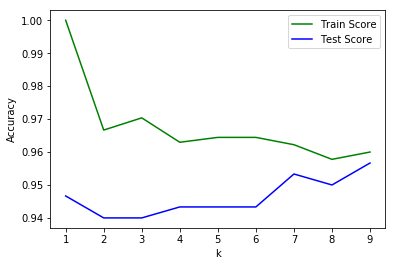

In [9]:
x_axis = range(1,10)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend();

Here we choose k=7 as the best parameter for KNN model.

In [10]:
knn = KNeighborsClassifier(7)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9622
Test score: 0.9533


In [11]:
report_table = [['KNN', 'k = 7', knn.score(X_train, y_train), knn.score(X_test, y_test)]]

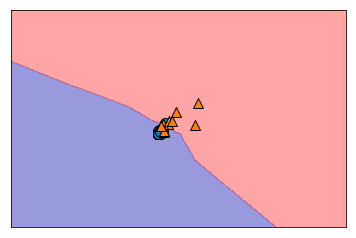

In [12]:
import mglearn
X_g = X_train[100:150,[3,8]]
y_g = y_train[100:150]

knn = KNeighborsClassifier(7)
knn.fit(X_g, y_g) 

mglearn.plots.plot_2d_separator(knn, X_g, fill=True, eps=0.2, alpha=.4)
mglearn.discrete_scatter(X_g[:, 0], X_g[:, 1], y_g);

## Logistic Regression

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [14]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [15]:
from sklearn.linear_model import LogisticRegression

c_range = [0.01, 0.1, 1, 10, 100]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

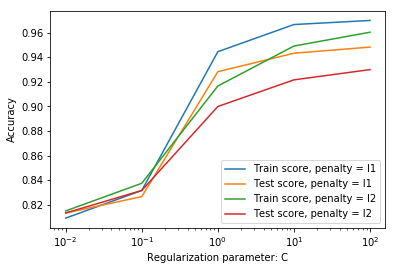

In [16]:
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

Best parameter for Logistic Regression model is C=10; L1.

In [17]:
logreg1 = LogisticRegression(penalty = 'l1', C = 10).fit(X_train, y_train)

print("Training set score: {:.4f}".format(logreg1.score(X_train, y_train)))
print("Test set score: {:.4f}".format(logreg1.score(X_test, y_test)))

Training set score: 0.9671
Test set score: 0.9433


In [18]:
report_table = report_table+[['LR1', 'C = 10', logreg1.score(X_train, y_train), logreg1.score(X_test, y_test)]]

## Linear Support Vector Machine

In [19]:
y.sum()/y.count()

0.19

Above value shows that this dataset is bias. Which means accuracy may not a be good evaluation function. For the rest of this project we consider AUC as a scoring function.

In [20]:
from sklearn.metrics import roc_auc_score

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)

In [22]:
grid_svc_lin.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='roc_auc', verbose=0)

In [23]:
grid_svc_lin.best_params_

{'C': 10}

In [24]:
y_svc_lin_predict_train = grid_svc_lin.predict(X_train)
y_svc_lin_predict = grid_svc_lin.predict(X_test)

In [25]:
report_table = report_table + [['LinearSVC', 'C = 10', grid_svc_lin.score(X_train, y_train), 
                                grid_svc_lin.score(X_test, y_test), roc_auc_score(y_svc_lin_predict_train, y_train), 
                                roc_auc_score(y_svc_lin_predict, y_test)]]

## Kernelized Support Vector Machine

In [26]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV

In [27]:
SVC_train=SVC()
svcparam_train={'C': [0.01, 0.1, 1, 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100]}

grid_svc_train=GridSearchCV(SVC_train, svcparam_train, cv=5)
grid_svc_train.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
print("Best alpha: {}".format(grid_svc_train.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svc_train.best_score_))
print("Best estimator:\n{}".format(grid_svc_train.best_estimator_))

Best alpha: {'C': 100, 'gamma': 1}
Best cross-validation score: 0.9542
Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [29]:
report_table = report_table + [['Kernelized SVM', 'C=100','gamma=1',grid_svc_train.best_score_]]

## Decision Tree

In [30]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=Twitter['BUZZ'],random_state=0)

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.4f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.0000
Accuracy on test set: 0.9293


Early stop with max_depth = 4 to avoid overfitting.

In [31]:
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.9733
Accuracy on test set: 0.9440


In [32]:
import pydotplus
from IPython.display import Image

import os 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [33]:
# Create DOT data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree, out_file=None, filled=True, rounded=True, special_characters=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

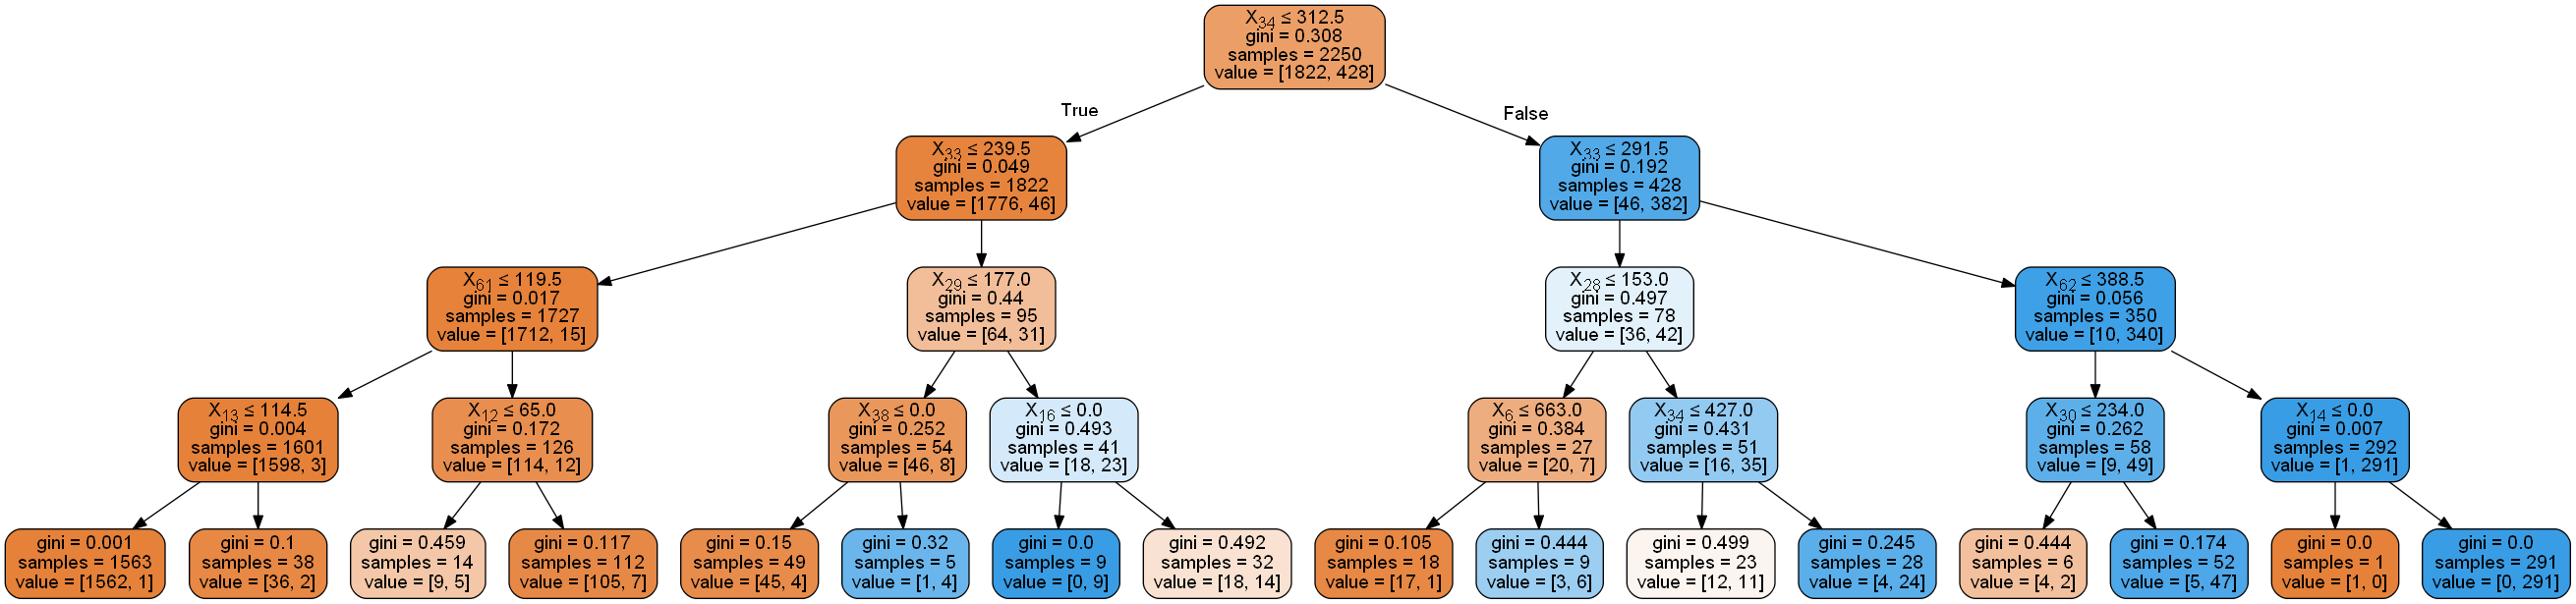

In [34]:
# Show graph
Image(graph.create_png())

In [35]:
report_table = report_table+[['Decision Tree','MaxDepth=4',dtree.score(X_train, y_train),dtree.score(X_test, y_test)]]

In [36]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter','Train accuracy', 
                                              'Test accuracy', 'Train auc score', 'Test auc score'])

In [37]:
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
Model name,,,,,,
KNN,KNN,k = 7,0.962222,0.953333,NaN,NaN
LR1,LR1,C = 10,0.967083,0.943333,NaN,NaN
LinearSVC,LinearSVC,C = 10,0.99056,0.985381,0.956198,0.909706
Kernelized SVM,Kernelized SVM,C=100,gamma=1,0.954167,NaN,NaN
Decision Tree,Decision Tree,MaxDepth=4,0.973333,0.944000,NaN,NaN


#### From the Report, Linear SVC is the best model with parameter of C = 10

In [38]:
Twitter_b = pd.read_csv('Twitter-Absolute-Sigma-500.csv',header=None,names=feature_names)
X_b = Twitter.iloc[:,0:77]
y_b = Twitter.loc[:,'BUZZ']

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
X_train_org_b, X_test_org_b, y_train_b, y_test_b = train_test_split(X_b, y_b,random_state=0, test_size = 0.1)

scaler = MinMaxScaler()
X_train_b = scaler.fit_transform(X_train_org_b)
X_test_b = scaler.transform(X_test_org_b)

In [40]:
svc_l_best = LinearSVC()
param_grid_best = {'C':[10]}

grid_svc_l_best = GridSearchCV(svc_l_best, param_grid, cv = 5, scoring='roc_auc', return_train_score=True)

In [41]:
grid_svc_l_best.fit(X_train_b, y_train_b)
y_svc_l_best_predict_train = grid_svc_l_best.predict(X_train_b)
y_svc_l_best_predict = grid_svc_l_best.predict(X_test_b)

In [42]:
print('auc score train:{:.4f}'.format(roc_auc_score(y_svc_l_best_predict_train, y_train_b))) 
print('auc score test:{:.4f}'.format(roc_auc_score(y_svc_l_best_predict, y_test_b)))

auc score train:0.9495
auc score test:0.9220
